
Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
    1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
    2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
    3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load dataset
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data['math score'].value_counts()>1

math score
65     True
62     True
69     True
59     True
61     True
      ...  
24    False
28    False
33    False
18    False
8     False
Name: count, Length: 81, dtype: bool

In [27]:
missing_values=data.isnull().sum()

In [28]:
missing_values


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Boxplot

<Axes: >

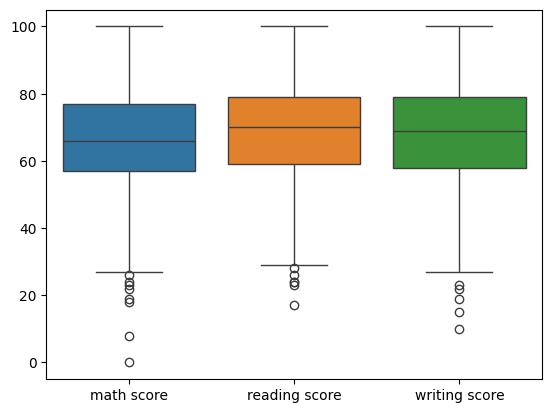

In [9]:
sns.boxplot(data)

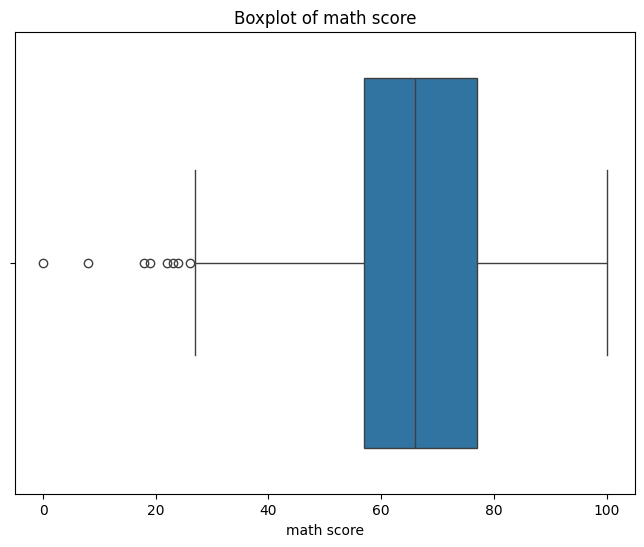

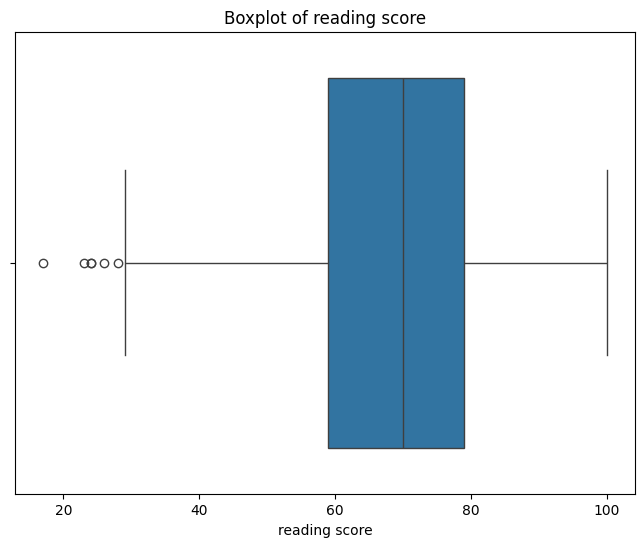

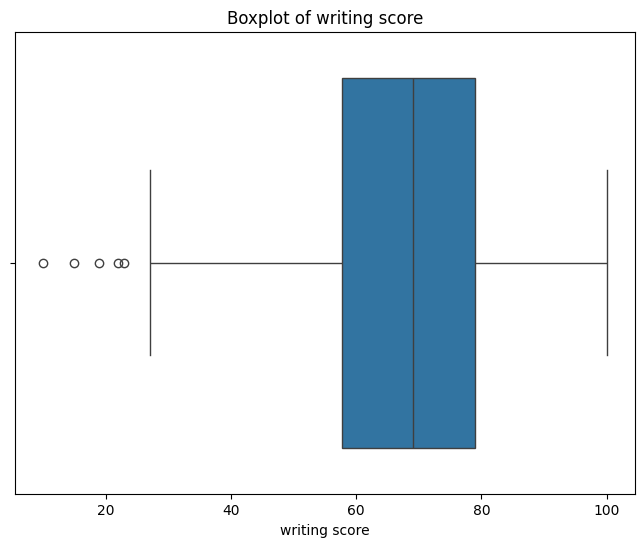

In [15]:
'''
# Assuming 'data' is your DataFrame
numeric_col = data.select_dtypes(include=['number']).columns

# Loop through numeric columns and create boxplots
for column in numeric_col:
    plt.figure(figsize=(8, 6))  # Adjust figsize to something more reasonable
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')  # Add title for clarity
    plt.show()  # Show the plot for each numeric column
'''

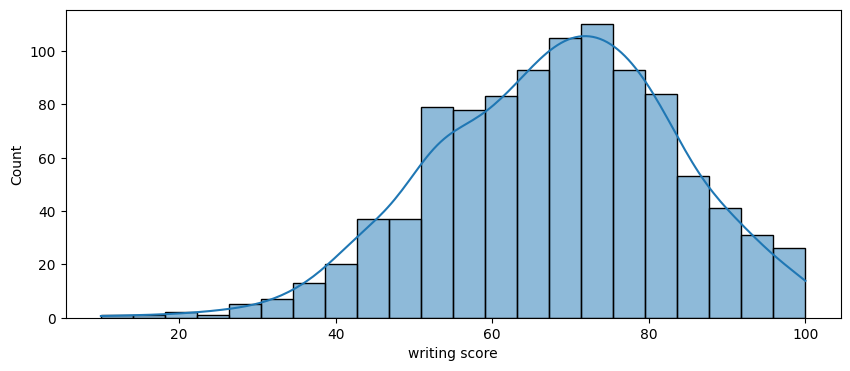

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(data['writing score'], kde=True)
sns.despine()
plt.show()

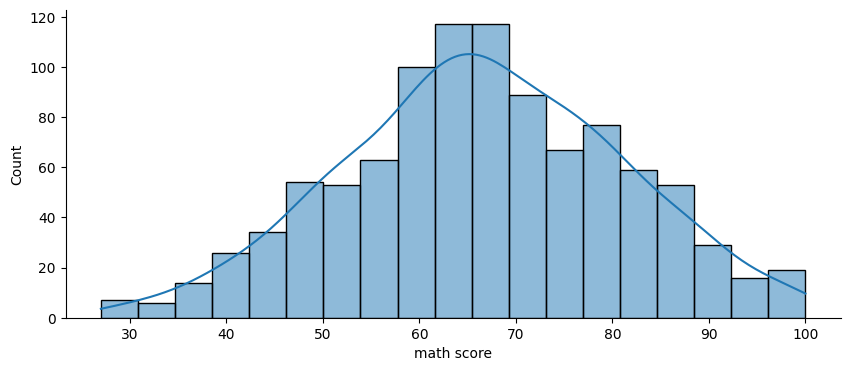

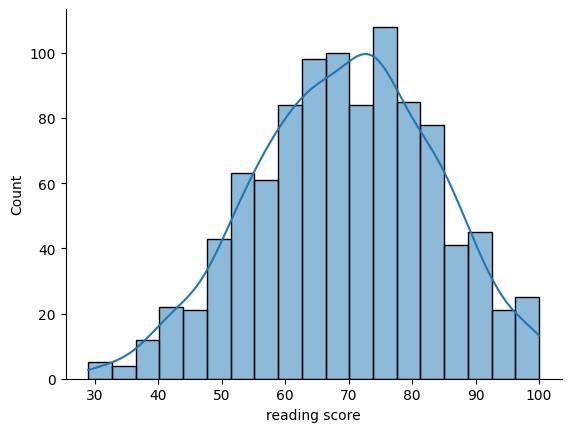

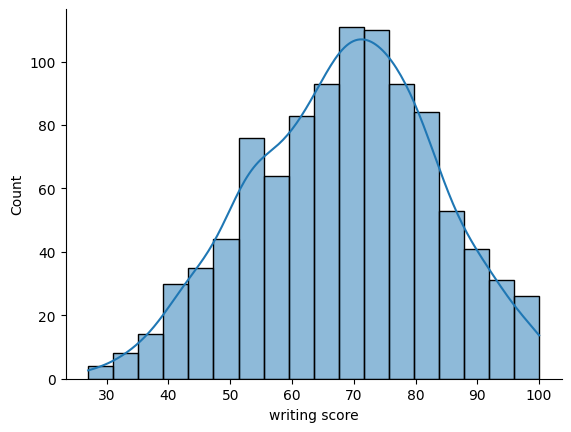

In [29]:
plt.figure(figsize=(10,4))

for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(data[i], kde=True)
    sns.despine()
    plt.show()
    print("\n\n")

#Outliers
1.Z-score

In [12]:
outliers = []

def detect_outliers_zs(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
                                                                                                                                                               

In [14]:
sample_outliers_math = detect_outliers_zs(data['math score'])
sample_outliers_reading = detect_outliers_zs(data['reading score'])
smaple_outliers_writing = detect_outliers_zs(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(smaple_outliers_writing)

[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]


2- IQR

In [16]:
outliers=[]

def detect_outliers_iqr(data):
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)

    
    for i in data:
        if(i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers        
    

In [17]:
sample_outliers_math = detect_outliers_iqr(data['math score'])
sample_outliers_reading = detect_outliers_iqr(data['reading score'])
sample_outliers_writing = detect_outliers_iqr(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]


In [18]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Dealing with Outliers We can replce the outliers values with the mean or median value and thus remove outliers from the dataset.


In [39]:
numeric_columns = data.select_dtypes(include=['number']).columns  # Select only numeric columns

skewness_before = data[numeric_columns].skew()
print("Skewness before replacing outliers:")
print(skewness_before)


median_math = data['math score'].median()
for i in sample_outliers_math:
    data['math score'].replace(to_replace=i, value=median_math, inplace=True)


median_write = data['writing score'].median()
for i in sample_outliers_writing:
  data['writing score'].replace(to_replace=i, value=median_write, inplace=True)


median_read = data['reading score'].median()
for i in sample_outliers_reading:
    data['reading score'].replace(to_replace=i, value=median_read, inplace=True)


Skewness before replacing outliers:
math score      -0.058490
reading score   -0.139879
writing score   -0.153952
dtype: float64


Boxplot after replacing outliers with median value

<Axes: >

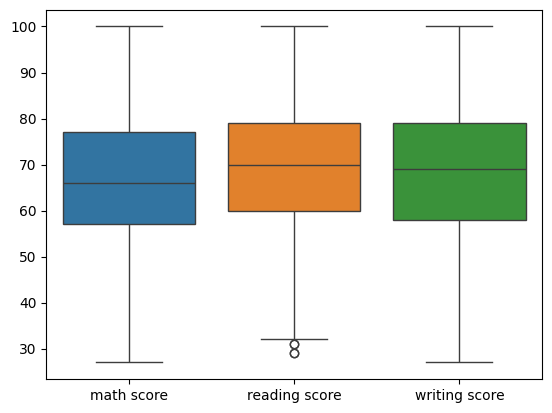

In [34]:
sns.boxplot(data)

Plotting histogram

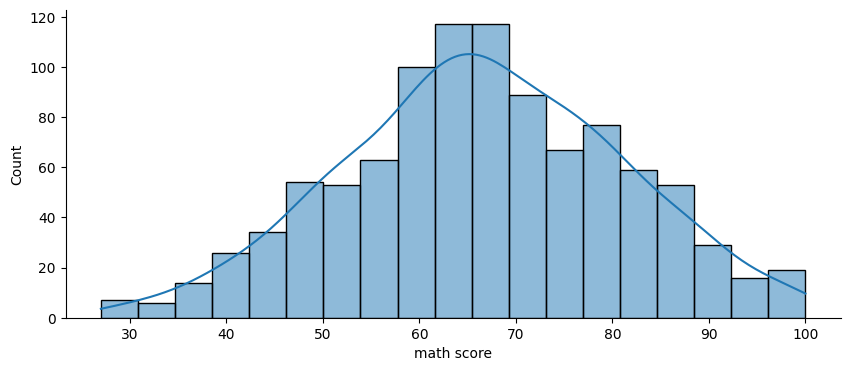

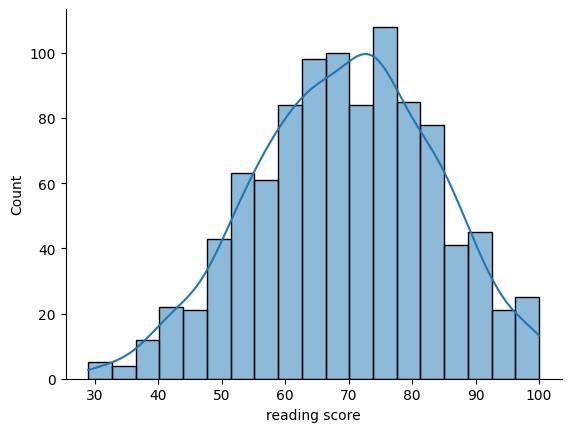

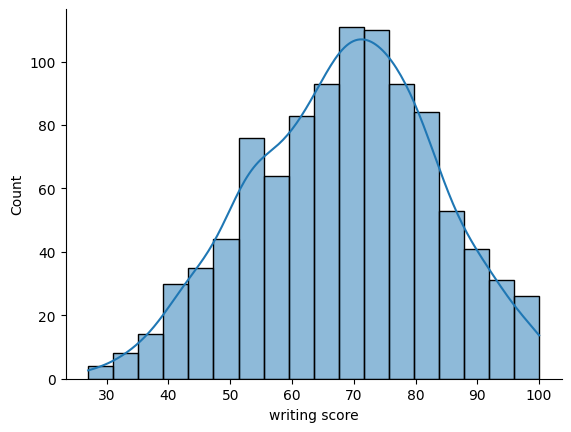

In [35]:
plt.figure(figsize=(10,4))

for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(data[i], kde=True)
    sns.despine()
    plt.show()
    print("\n\n")

In [40]:
skewness_after = data[numeric_columns].skew()

# Print skewness after replacing outliers
print("\nSkewness after replacing outliers with median:")
print(skewness_after)


Skewness after replacing outliers with median:
math score      -0.058490
reading score   -0.139879
writing score   -0.153952
dtype: float64
